In [1]:
import pandas as pd
city_data_df = pd.read_csv('city_data.csv')
city_list_df = pd.read_csv('city_list.csv')
global_data_df = pd.read_csv('city_data.csv')

# Project: Moving Averages

* used to smooth out data to observe longer stretches of data.
 * normalize nearby data noise
 * normalize daily fluctuations
 
 <img src='images/daily-sales.png'>
 One option is to average the sales over the week, but we loose detail when we do this.
 <img src='images/weekly-sales.png'>
 Moving average smooths out daily volatility. It is another solution outside of summing up weekly sales
 <img src='images/7day-moving-average.png'>
 

# How do we calculate a moving average 
* One way to do it is by using a spreadsheet

In [8]:

%load_ext sql

In [6]:
import os
local = os.environ.get('LDB')

In [11]:
%sql $local select * from city_list where country ilike '%Philippines%' and city ilike '%Man%'

1 rows affected.


index,city,country
190,Manila,Philippines


In [51]:
%%sql $local
select * from city_data where city = 'Manila'

169 rows affected.


index,year,city,country,avg_temp
39038,1845,Manila,Philippines,25.51
39039,1846,Manila,Philippines,26.41
39040,1847,Manila,Philippines,25.88
39041,1848,Manila,Philippines,25.68
39042,1849,Manila,Philippines,25.92
39043,1850,Manila,Philippines,25.92
39044,1851,Manila,Philippines,26.09
39045,1852,Manila,Philippines,26.02
39046,1853,Manila,Philippines,26.21
39047,1854,Manila,Philippines,26.33


In [8]:
import pandas as pd

cd = pd.read_csv('city_data.csv')
cl = pd.read_csv('city_list.csv')
gd = pd.read_csv('global_data.csv')


In [245]:
#%sql $local select * from city_list where country = 'Egypt'
%sql $local select * from city_list where city = 'Santiago'

3 rows affected.


index,city,country
279,Santiago,Chile
280,Santiago,Dominican Republic
281,Santiago,Philippines


In [200]:
cd[(cd.city == city) & (cd.avg_temp == 0.25)]

,year,city,country,avg_temp,MA
46204,1779,New York,United States,0.25,8.374


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
index = 10

city =  city_plot_data[index].city.sample().item()


cd['MA'] = cd[cd.city == city].avg_temp.rolling(window=10).mean()
cd['MA25'] = cd[cd.city == city].avg_temp.rolling(window=25).mean()



Year =  cd[(cd.city == city)&(~cd.MA.isna())].year
MA_10yr =  cd[(cd.city == city)&(~cd.MA.isna())].MA
avg_temp =  cd[(cd.city == city)&(~cd.MA.isna())].avg_temp
data_plot = pd.DataFrame({"Year":Year, "MA_10yr":MA_10yr})
data_plot_avg_temp = pd.DataFrame({"Year":Year, "avg_temp":avg_temp})
# 
sns.lineplot(x = "Year", y = "MA_10yr", data=data_plot)
#sns.lineplot(x = "Year", y = "avg_temp", data=data_plot_avg_temp)
plt.title(city)
plt.legend(['10 YR Moving Avg', 'Yearly Avg Temp'])
plt.show()
#avg_temp.mean()

NameError: name 'city_plot_data' is not defined

In [ ]:
#countries 
#for city in city list:
cmd = '''
select distinct country 
from city_list
'''
%sql $local  $cmd


In [84]:
# lets get every city and prep their data to be graphable
for index, cl_item in cl.iterrows():
    cd['MA'] = cd[cd.city == cl_item.city].avg_temp.rolling(window=10).mean()

In [173]:
city_data_gb_city = cd.groupby('city')
city_data_gb_city_avgtmps =  city_data_gb_city.agg({'avg_temp' : 'mean'})
city_data_gb_city_avgtmps [city_data_gb_city_avgtmps.index == 'San Francisco']

#groupped_data = df.groupby(['week', 'day']).agg({'sales': 'sum'})



,avg_temp
city,
San Francisco,14.450788


In [28]:
def graph_city(city_name):
    Year =  cd[(cd.city == city_name)&(~cd.MA.isna())].year
    MA_10yr =  cd[(cd.city == city_name)&(~cd.MA.isna())].MA
    avg_temp =  cd[(cd.city == city_name)&(~cd.MA.isna())].avg_temp
    data_plot = pd.DataFrame({"Year":Year, "MA_10yr":MA_10yr})
    data_plot_avg_temp = pd.DataFrame({"Year":Year, "avg_temp":avg_temp})
    # 
    sns.lineplot(x = "Year", y = "MA_10yr", data=data_plot)
    sns.lineplot(x = "Year", y = "avg_temp", data=data_plot_avg_temp)
    
    random_city_item = cl[cl.city == random_city]
    plt.title(city_name, random_city_item.country)
    plt.legend(['10 YR Moving Avg', 'Yearly Avg Temp'])
    plt.show()

In [10]:
largest_cities = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_cities#List')
largest_cities[1]

City[a]        Country Skyline UN 2018 population estimates[b]  \
             City[a]        Country Skyline UN 2018 population estimates[b]   
0              Tokyo          Japan     NaN                        37400068   
1              Delhi          India     NaN                        28514000   
2           Shanghai          China     NaN                        25582000   
3          São Paulo         Brazil     NaN                        21650000   
4        Mexico City         Mexico     NaN                        21581000   
..               ...            ...     ...                             ...   
76  Washington, D.C.  United States     NaN                         5207000   
77            Yangon        Myanmar     NaN                         5157000   
78        Alexandria          Egypt     NaN                         5086000   
79             Jinan          China     NaN                         5052000   
80       Guadalajara         Mexico     NaN                         5023000   

                City proper[c]                             \
                    Definition      Population  Area(km2)   
0        Metropolis prefecture  13,515,271[14]  2,191[14]   
1   National capital territory  16,753,235[16]       1484   
2                 Municipality  24,183,000[18]       6341   
3                 Municipality  12,252,023[19]       1521   
4                   City-state   8,918,653[21]       1485   
..                         ...             ...        ...   
76            Federal district     702,455[30]        177   
77                        City             NaN        NaN   
78           Urban governorate             NaN        NaN   
79       City (sub-provincial)         8700000      10244   
80                Municipality         1460148        151   

   Metropolitan area[d]             Urban area(Demographia)[12]            
             Population   Area(km2)                  Population Area(km2)  
0        37,274,000[15]  13,452[15]                  37977000.0  8,230[e]  
1        29,000,000[17]   3,483[17]                  29617000.0  2,232[f]  
2                   NaN         NaN                  22120000.0  4,068[g]  
3        21,734,682[20]        7947                  22046000.0  3,116[h]  
4        20,892,724[22]        7854                  20996000.0      2386  
..                  ...         ...                         ...       ...  
76        6,263,245[98]       17009                   7518000.0  5,500[s]  
77                  NaN         NaN                   6314000.0       603  
78                  NaN         NaN                   4318000.0       292  
79                  NaN         NaN                   4026000.0       797  
80              5002466        2734                   5253000.0       810  

[81 rows x 11 columns]

In [11]:
best_cities = pd.read_html('https://en.wikipedia.org/wiki/Global_city#The_World\'s_Best_Cities')
best_cities[0].City

0          New York
1            London
2             Tokyo
3         Hong Kong
4             Paris
5         Singapore
6       Los Angeles
7          Shanghai
8           Beijing
9             Seoul
10          Chicago
11    San Francisco
12          Toronto
13           Sydney
14           Berlin
15           Boston
16           Moscow
17        Amsterdam
18            Dubai
19         Istanbul
Name: City, dtype: object

In [106]:
def generate_city_MA_data(city):
    cd['MA10'] = cd[cd.city == city].avg_temp.rolling(window=10).mean()
    cd['MA25'] = cd[cd.city == city].avg_temp.rolling(window=25).mean()
    cd['MA10_F'] = cd[cd.city == city].avg_temp_f.rolling(window=10).mean()
    cd['MA25_F'] = cd[cd.city == city].avg_temp_f.rolling(window=25).mean()
    Year =  cd[(cd.city == city)].year
    MA_10yr =  cd[(cd.city == city)&(~cd.MA10.isna())].MA10
    MA_25yr =  cd[(cd.city == city)&(~cd.MA25.isna())].MA25
    avg_temp =  cd[(cd.city == city)].avg_temp
    MA_10yr_F =  cd[(cd.city == city)&(~cd.MA10_F.isna())].MA10_F
    MA_25yr_F =  cd[(cd.city == city)&(~cd.MA25_F.isna())].MA25_F
    avg_temp_f =  cd[(cd.city == city)].avg_temp_f
    data_plot = pd.DataFrame({"city": city, "Year":Year, "MA_10yr":MA_10yr, "MA_25yr":MA_25yr, 'avg_temp' :avg_temp,
                             "MA_10yr_F":MA_10yr_F, "MA_25yr_F":MA_25yr_F, 'avg_temp_f' :avg_temp_f })
    return data_plot
    

In [13]:
def generate_citycountry_MA_data(city, country):
    cd['MA10'] = cd[(cd.city == city)&(cd.country == country)].avg_temp.rolling(window=10).mean()
    cd['MA25'] = cd[(cd.city == city)&(cd.country == country)].avg_temp.rolling(window=25).mean()
    Year =  cd[(cd.city == city)&(cd.country == country)].year
    MA_10yr =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA10.isna())].MA10
    MA_25yr =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA25.isna())].MA25
    avg_temp =  cd[(cd.city == city)&(cd.country == country)].avg_temp
    data_plot = pd.DataFrame({"city": city, "country" : country, "Year":Year, "MA_10yr":MA_10yr, "MA_25yr":MA_25yr, 'avg_temp' :avg_temp})
    return data_plot
    

In [14]:
def generate_citycountry_MA_F_data(city, country):
    cd['MA10'] = cd[(cd.city == city)&(cd.country == country)].avg_temp.rolling(window=10).mean()
    cd['MA25'] = cd[(cd.city == city)&(cd.country == country)].avg_temp.rolling(window=25).mean()
    cd['MA10_F'] = cd[(cd.city == city)&(cd.country == country)].avg_temp_f.rolling(window=10).mean()
    cd['MA25_F'] = cd[(cd.city == city)&(cd.country == country)].avg_temp_f.rolling(window=25).mean()
    Year =  cd[(cd.city == city)&(cd.country == country)].year
    MA_10yr =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA10.isna())].MA10
    MA_25yr =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA25.isna())].MA25
    MA_10yr_F =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA10_F.isna())].MA10_F
    MA_25yr_F =  cd[(cd.city == city)&(cd.country == country)&(~cd.MA25_F.isna())].MA25_F
    avg_temp =  cd[(cd.city == city)&(cd.country == country)].avg_temp
    avg_temp_f =  cd[(cd.city == city)&(cd.country == country)].avg_temp_f
    data_plot = pd.DataFrame({"city": city, "country" : country, "Year":Year
                              , "MA_10yr":MA_10yr, "MA_25yr":MA_25yr, 'avg_temp' :avg_temp
                              , "MA_10yr_F":MA_10yr_F, "MA_25yr_F":MA_25yr_F, 'avg_temp_f' :avg_temp_f})
    return data_plot
    

In [15]:

def plot_city_10yr_MA(city):
    cd['MA'] = cd[cd.city == city].avg_temp.rolling(window=10).mean()
    Year =  cd[(cd.city == city)&(~cd.MA.isna())].year
    MA_10yr =  cd[(cd.city == city)&(~cd.MA.isna())].MA
    #avg_temp =  cd[(cd.city == city)&(~cd.MA.isna())].avg_temp
    data_plot = pd.DataFrame({"Year":Year, "MA_10yr":MA_10yr})
    data_plot_avg_temp = pd.DataFrame({"city" : city,"Year":Year, "avg_temp":avg_temp})
    # 
    sns.lineplot(x = "Year", y = "MA_10yr", data=data_plot)
    #sns.lineplot(x = "Year", y = "avg_temp", data=data_plot_avg_temp)
    plt.title(city)
    plt.legend(['10 YR Moving Avg'])
#avg_temp.mean()

In [107]:
best_city_plot_data = []
for city_name in  best_cities[0].City:
    temp = cl[cl.city == city_name]
    if not temp.empty:
        generated_df = generate_city_MA_data(city_name)
        best_city_plot_data.append(generated_df)
        #best_city_plot_data.append(generated_df)
    #best_city_plot_data.append(generate_city_10yr_MA_data(city_name))
#    generated_df = generate_citycountry_MA_F_data(city_name,country)
#    if not generated_df.empty:
#        best_city_plot_data.append(generated_df)
    

In [212]:
# Generate data for ALL cities
city_plot_data = []
for index, city_info in  cl.iterrows():
    #print(city_info.city, city_info.country)
#    #city_plot_data.append(generate_city_10yr_MA_data(city_name))
    generated_df = generate_citycountry_MA_F_data(city_info.city, city_info.country)
    if not generated_df.empty:
        city_plot_data.append(generated_df)
    

In [13]:
# Plot best cities
from matplotlib import pyplot

a4_dims = (18, 8.27)

best_city_plot_data_joined = pd.concat(best_city_plot_data)
#best_city_plot_data_joined_trimmed = best_city_plot_data_joined[best_city_plot_data_joined.year > 1900]


fig, ax = pyplot.subplots(figsize= a4_dims)

df = best_city_plot_data_joined


plt.title("10 Year Moving Average")
sns.lineplot(x = df.Year
             , y = df.MA_10yr_F
             , data=df
             , hue=df.city
             , ci=None)
plt.show()

NameError: name 'pd' is not defined

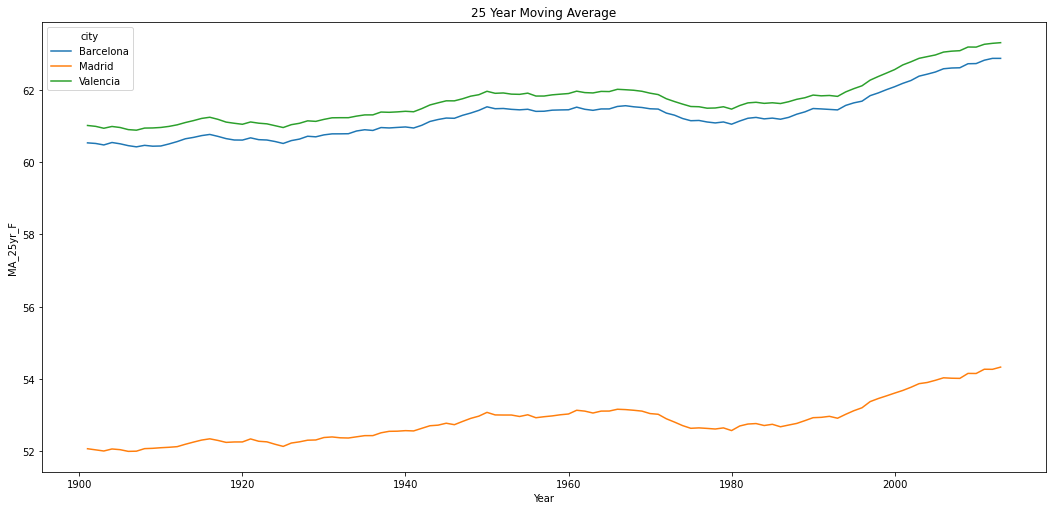

In [65]:
from matplotlib import pyplot

a4_dims = (18, 8.27)

city_plot_data_joined = pd.concat(city_plot_data)
city_plot_data_joined_trimmed = city_plot_data_joined[city_plot_data_joined.Year > 1900]


fig, ax = pyplot.subplots(figsize= a4_dims)

df = city_plot_data_joined_trimmed
#df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin(cities_with_avg_temp_gt_8C_lt_12C)]
#df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin(cities_with_avg_temp_gt_12C_lt_17C)]
df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.country == 'Spain']


plt.title("25 Year Moving Average")
sns.lineplot(x = df.Year
             , y = df.MA_25yr_F
             , data=df
             , hue=df.city
             , ci=None)
plt.show()

In [39]:
total_avgs = []
for city_info in city_plot_data:
    #print(city_info.sample().city.item(), city_info.avg_temp.mean())
    total_avgs.append({ 'city' : city_info.sample().city.item(), 'total_avg_temp' :city_info.avg_temp.mean() })


In [40]:
total_avgs_df = pd.DataFrame(total_avgs)
total_avgs_df.sort_values(by='total_avg_temp')

,city,total_avg_temp
318,Ulaanbaatar,-3.367113
227,Novosibirsk,-0.102680
231,Omsk,0.060594
239,Perm,0.957849
317,Ufa,1.739919
...,...,...
192,Maracaibo,27.328563
185,Maiduguri,28.001554
234,Ouagadougou,28.049167
225,Niamey,29.039801


In [56]:
cities_with_avg_temp_gt_8C_lt_12C = total_avgs_df[(total_avgs_df.total_avg_temp > 8) & (total_avgs_df.total_avg_temp < 12)].city.to_list()
cities_with_avg_temp_gt_8C_lt_12C

['New York', 'London', 'Paris', 'Seoul', 'Chicago', 'Berlin', 'Amsterdam']

In [58]:

cities_with_avg_temp_gt_12C_lt_17C = total_avgs_df[(total_avgs_df.total_avg_temp > 12) & (total_avgs_df.total_avg_temp < 17)].city.to_list()
cities_with_avg_temp_gt_12C_lt_17C

['Tokyo', 'Los Angeles', 'Shanghai', 'San Francisco', 'Istanbul']

In [36]:
# calculate global average
# for every year, get average
global_yearly_avg_temp = cd.groupby('year').mean().reset_index()

In [39]:
global_yearly_avg_temp.to_csv('global_yearly_avg_temp.csv')

In [40]:
global_yearly_avg_temp

,year,avg_temp,MA10,MA25,avg_temp_f,MA10_F,MA25_F
0,1743,4.725443,NaN,NaN,40.505797,NaN,NaN
1,1744,11.230253,NaN,NaN,52.214456,NaN,NaN
2,1745,1.678481,NaN,NaN,35.021266,NaN,NaN
3,1746,NaN,NaN,NaN,NaN,NaN,NaN
4,1747,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
266,2009,18.056871,21.365,21.2116,64.502368,70.4570,70.18088
267,2010,18.068743,21.343,21.2160,64.523737,70.4174,70.18880
268,2011,17.914912,21.375,21.2416,64.246842,70.4750,70.23488
269,2012,18.101813,21.377,21.2648,64.583263,70.4786,70.27664


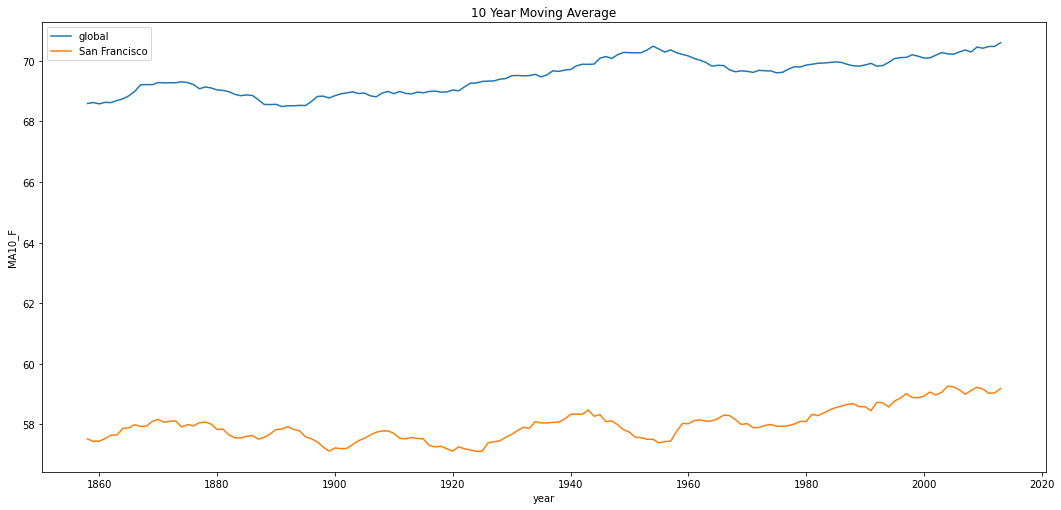

In [63]:

fig, ax = pyplot.subplots(figsize= a4_dims)

df = global_yearly_avg_temp
#df = global_yearly_avg_temp[global_yearly_avg_temp.year > 1900]

#city_plot_data_joined_trimmed = city_plot_data_joined[city_plot_data_joined.Year > 1900]

city = 'San Francisco'
city_plot_data_joined_trimmed = city_plot_data_joined
df2 = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin([city])]

plt.title("10 Year Moving Average")
sns.lineplot(x = df.year
             , y = df.MA10_F
             , data=df
             , ci=None)
#plt.show()
#fig, ax = pyplot.subplots(figsize= a4_dims)
sns.lineplot(x = df2.Year
             , y = df2.MA_10yr_F
             , data=df2
             , ci=None)
plt.legend(['global', city])
plt.show()

In [41]:
#df.corr(method='pearson')
global_yearly_avg_temp.corr(method='pearson')

,year,avg_temp,MA10,MA25,avg_temp_f,MA10_F,MA25_F
year,1.000000,0.884930,0.854732,0.886074,0.884930,0.854732,0.886074
avg_temp,0.884930,1.000000,0.738604,0.763966,1.000000,0.738604,0.763966
MA10,0.854732,0.738604,1.000000,0.930385,0.738604,1.000000,0.930385
MA25,0.886074,0.763966,0.930385,1.000000,0.763966,0.930385,1.000000
avg_temp_f,0.884930,1.000000,0.738604,0.763966,1.000000,0.738604,0.763966
MA10_F,0.854732,0.738604,1.000000,0.930385,0.738604,1.000000,0.930385
MA25_F,0.886074,0.763966,0.930385,1.000000,0.763966,0.930385,1.000000


In [64]:
df2.corr(method='pearson')

,Year,MA_10yr,MA_25yr,avg_temp
Year,1.000000,0.694431,0.756184,0.467342
MA_10yr,0.694431,1.000000,0.901977,0.609045
MA_25yr,0.756184,0.901977,1.000000,0.572850
avg_temp,0.467342,0.609045,0.572850,1.000000


In [134]:
# retrieve longitutde and latitudes
for index, city_info in cl[181:].iterrows():
    city = city_info.city
    country = city_info.country
    location = geolocator.geocode("{0},{1}".format(city, country))
#    print(city,country)
#    print(location.raw['lat'])
#    print(location.raw['lon'])
    cl.loc[index,'lat'] = location.raw['lat']
    cl.loc[index,'lon'] = location.raw['lon']

In [161]:
# retrieve continent info
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

#for index, city_info in cl[~cl.country.str.contains(r'\(|ô|Guinea Bissau|Bosnia And Herzegovina')].iterrows():
for index, city_info in cl.iterrows():
    if(city_info.country == 'Guinea Bissau'):
        country_code = 'GW'
    elif(city_info.country == 'Bosnia And Herzegovina'):
        country_code = 'BA'
    elif(city_info.country == "Côte D'Ivoire"):
        country_code = 'CI'
    elif(city_info.country == "Congo (Democratic Republic Of The)"):
        country_code = pc.country_name_to_country_alpha2('Congo')
    else:
        country_code = pc.country_name_to_country_alpha2(city_info.country)
        
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    cl.loc[index, 'continent'] = continents[continent_name]

In [158]:
cl.to_csv('city_list_extended.csv')

In [21]:
cl = pd.read_csv('city_list_extended.csv', index_col=0)

In [26]:
cd = pd.read_csv('city_data_extended.csv', index_col=0)

In [27]:
cd

,year,city,country,avg_temp,MA10,MA25,avg_temp_f,MA10_F,MA25_F
0,1849,Abidjan,Côte D'Ivoire,25.58,NaN,NaN,78.044,NaN,NaN
1,1850,Abidjan,Côte D'Ivoire,25.52,NaN,NaN,77.936,NaN,NaN
2,1851,Abidjan,Côte D'Ivoire,25.67,NaN,NaN,78.206,NaN,NaN
3,1852,Abidjan,Côte D'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,21.365,21.2116,71.168,70.4570,70.18088
70788,2010,Zapopan,Mexico,20.90,21.343,21.2160,69.620,70.4174,70.18880
70789,2011,Zapopan,Mexico,21.55,21.375,21.2416,70.790,70.4750,70.23488
70790,2012,Zapopan,Mexico,21.52,21.377,21.2648,70.736,70.4786,70.27664


In [25]:
# convert city_data to Fahrenheit
cd['avg_temp_f'] = cd.avg_temp.dropna().apply(lambda x : x * (9/5)+32)
cd

,year,city,country,avg_temp,MA10,MA25,avg_temp_f
0,1849,Abidjan,Côte D'Ivoire,25.58,NaN,NaN,78.044
1,1850,Abidjan,Côte D'Ivoire,25.52,NaN,NaN,77.936
2,1851,Abidjan,Côte D'Ivoire,25.67,NaN,NaN,78.206
3,1852,Abidjan,Côte D'Ivoire,NaN,NaN,NaN,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,NaN,NaN,71.168
70788,2010,Zapopan,Mexico,20.90,NaN,NaN,69.620
70789,2011,Zapopan,Mexico,21.55,NaN,NaN,70.790
70790,2012,Zapopan,Mexico,21.52,NaN,NaN,70.736


In [206]:

cd.to_csv('city_data_extended.csv')

In [164]:

total_avgs_df[(total_avgs_df.total_avg_temp > 20) & (total_avgs_df.total_avg_temp < 22)].sort_values(by='total_avg_temp')

,city,total_avg_temp
24,Austin,20.000567
273,San Antonio,20.000567
169,Lilongwe,20.000922
118,Harare,20.202183
223,New Orleans,20.221422
124,Houston,20.231598
9,Alexandria,20.318072
92,Durban,20.352611
183,Lusaka,20.427535
180,Lubumbashi,20.619507


In [212]:
total_avgs_df.sort_values(by='total_avg_temp', ascending=False).head(25)

,city,total_avg_temp
151,Khartoum,29.061678
225,Niamey,29.039801
234,Ouagadougou,28.049167
185,Maiduguri,28.001554
192,Maracaibo,27.328563
123,Ho Chi Minh City,27.184655
31,Bangkok,27.154263
206,Mogadishu,27.150851
47,Bissau,27.053861
226,Nouakchott,27.023851


In [ ]:
# average per latitude and longitude

In [ ]:
# Similarities between city average and global average is that the temperature has been overall increasing (hints at global warming)
# difference is that it is much colder than the global average year by year (around 6-7 degrees colder than global average per year)
# difference has been generaly consistent over tme 
# It shows that the world is getting hotter, and has been consisent over the last few hundred years

In [ ]:
#correlation coeffficient is the likelhood the data can be graphed to a line

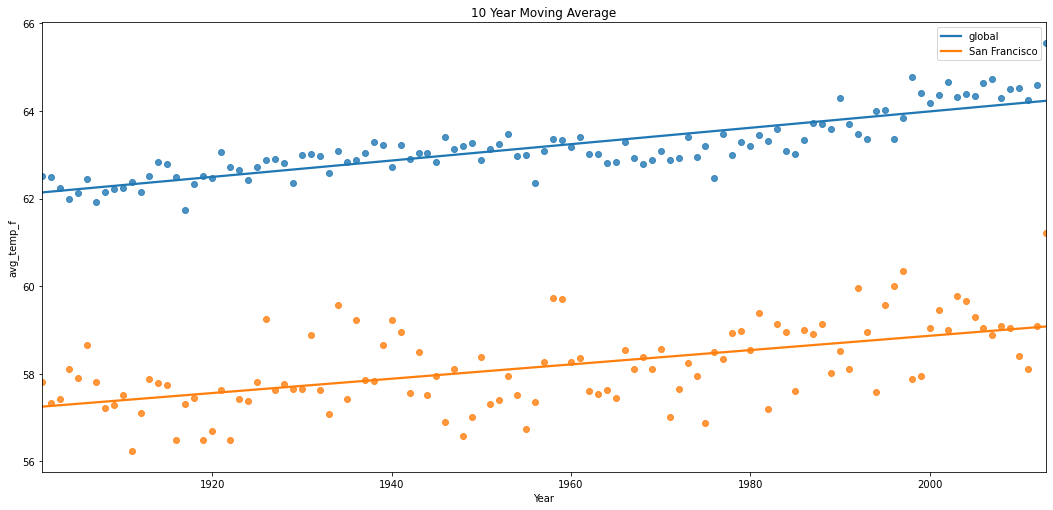

In [64]:
# use regplots 
fig, ax = pyplot.subplots(figsize= a4_dims)

df = global_yearly_avg_temp
df = global_yearly_avg_temp[global_yearly_avg_temp.year > 1900]


city = 'San Francisco'
city_plot_data_joined_trimmed = city_plot_data_joined[city_plot_data_joined.Year > 1900]
df2 = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin([city])]

plt.title("10 Year Moving Average")
sns.regplot(x = df.year
             , y = df.avg_temp_f
             , data=df
             , ci=None)
#plt.show()
#fig, ax = pyplot.subplots(figsize= a4_dims)
sns.regplot(x = df2.Year
             , y = df2.avg_temp_f
             , data=df2
             , ci=None)
plt.legend([ 'global', city])
plt.show()

In [115]:
city_plot_data_joined.columns

Index(['city', 'country', 'Year', 'MA_10yr', 'MA_25yr', 'avg_temp',
       'MA_10yr_F', 'MA_25yr_F', 'avg_temp_f'],
      dtype='object')

AttributeError: 'DataFrame' object has no attribute 'continent'

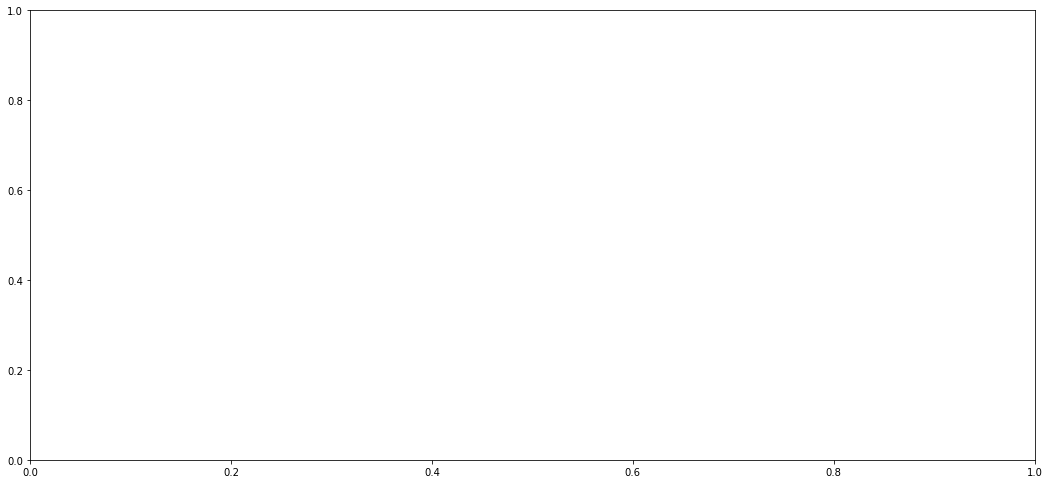

In [110]:

from matplotlib import pyplot

a4_dims = (18, 8.27)

city_plot_data_joined = pd.concat(city_plot_data)
city_plot_data_joined_trimmed = city_plot_data_joined[city_plot_data_joined.Year > 1900]


fig, ax = pyplot.subplots(figsize= a4_dims)

df = city_plot_data_joined_trimmed
#df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin(cities_with_avg_temp_gt_8C_lt_12C)]
#df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.city.isin(cities_with_avg_temp_gt_12C_lt_17C)]
df = city_plot_data_joined_trimmed [city_plot_data_joined_trimmed.continent == 'Asia']


plt.title("25 Year Moving Average")
sns.lineplot(x = df.Year
             , y = df.MA_25yr_F
             , data=df
             , hue=df.city
             , ci=None)
plt.show()

In [83]:
cl

,city,country,lat,lon,continent
0,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa
1,Abu Dhabi,United Arab Emirates,24.453835,54.377401,Asia
2,Abuja,Nigeria,9.064331,7.489297,Africa
3,Accra,Ghana,5.560014,-0.205744,Africa
4,Adana,Turkey,36.993617,35.325835,Asia
...,...,...,...,...,...
337,Xuzhou,China,34.206659,117.278286,Asia
338,Yamoussoukro,Côte D'Ivoire,6.809107,-5.273263,Africa
339,Yerevan,Armenia,40.177612,44.512585,Asia
340,Zagreb,Croatia,45.813185,15.977177,Europe


In [279]:
cd = pd.read_csv('city_data_extended2.csv', index_col=0)
cd

,city,country,lat,lon,continent,city_id,year,avg_temp,MA10,MA25,avg_temp_f,MA10_F,MA25_F
0,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa,0,1849,25.58,NaN,NaN,78.044,NaN,NaN
1,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa,0,1850,25.52,NaN,NaN,77.936,NaN,NaN
2,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa,0,1851,25.67,NaN,NaN,78.206,NaN,NaN
3,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa,0,1852,NaN,NaN,NaN,NaN,NaN,NaN
4,Abidjan,Côte D'Ivoire,5.320357,-4.016107,Africa,0,1853,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70787,Zapopan,Mexico,20.721120,-103.391367,North America,341,2009,21.76,21.365,21.2116,71.168,70.4570,70.18088
70788,Zapopan,Mexico,20.721120,-103.391367,North America,341,2010,20.90,21.343,21.2160,69.620,70.4174,70.18880
70789,Zapopan,Mexico,20.721120,-103.391367,North America,341,2011,21.55,21.375,21.2416,70.790,70.4750,70.23488
70790,Zapopan,Mexico,20.721120,-103.391367,North America,341,2012,21.52,21.377,21.2648,70.736,70.4786,70.27664


In [123]:

cd = pd.merge(cl, cd, left_on=['city','country'],right_on=['city','country'])

In [124]:
cd.to_csv('city_data_extended2.csv')

In [217]:
city_plot_data_joined = pd.concat(city_plot_data)
city_plot_data_joined [city_plot_data_joined.city == 'San Francisco']

,city,country,Year,MA_10yr,MA_25yr,avg_temp,MA_10yr_F,MA_25yr_F,avg_temp_f
56816,San Francisco,United States,1849,NaN,NaN,14.12,NaN,NaN,57.416
56817,San Francisco,United States,1850,NaN,NaN,13.80,NaN,NaN,56.840
56818,San Francisco,United States,1851,NaN,NaN,14.39,NaN,NaN,57.902
56819,San Francisco,United States,1852,NaN,NaN,13.81,NaN,NaN,56.858
56820,San Francisco,United States,1853,NaN,NaN,14.40,NaN,NaN,57.920
...,...,...,...,...,...,...,...,...,...
56976,San Francisco,United States,2009,15.127,14.9732,15.02,59.2286,58.95176,59.036
56977,San Francisco,United States,2010,15.092,14.9908,14.67,59.1656,58.98344,58.406
56978,San Francisco,United States,2011,15.017,14.9708,14.50,59.0306,58.94744,58.100
56979,San Francisco,United States,2012,15.022,14.9748,15.05,59.0396,58.95464,59.090


In [232]:
cdgb = cd.groupby(['city_id'])

In [283]:
for index, cg in cdgb:
    cg['MA10'] = cg[cg.city_id == cg.city_id].avg_temp.rolling(window=10).mean()
    cg['MA25'] = cg[cg.city_id == cg.city_id].avg_temp.rolling(window=25).mean()
    cg['MA10_F'] = cg[cg.city_id == cg.city_id].avg_temp_f.rolling(window=10).mean()
    cg['MA25_F'] = cg[cg.city_id == cg.city_id].avg_temp_f.rolling(window=25).mean()
    cd.loc[cg.index, 'MA10'] = cg['MA10']
    cd.loc[cg.index, 'MA25'] = cg['MA25']
    cd.loc[cg.index, 'MA10_F'] = cg['MA10_F']
    cd.loc[cg.index, 'MA25_F'] = cg['MA25_F']

    


In [287]:
cd[cd.city == 'San Francisco']

,city,country,lat,lon,continent,city_id,year,avg_temp,MA10,MA25,avg_temp_f,MA10_F,MA25_F
56816,San Francisco,United States,37.779026,-122.419906,North America,275,1849,14.12,NaN,NaN,57.416,NaN,NaN
56817,San Francisco,United States,37.779026,-122.419906,North America,275,1850,13.80,NaN,NaN,56.840,NaN,NaN
56818,San Francisco,United States,37.779026,-122.419906,North America,275,1851,14.39,NaN,NaN,57.902,NaN,NaN
56819,San Francisco,United States,37.779026,-122.419906,North America,275,1852,13.81,NaN,NaN,56.858,NaN,NaN
56820,San Francisco,United States,37.779026,-122.419906,North America,275,1853,14.40,NaN,NaN,57.920,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,San Francisco,United States,37.779026,-122.419906,North America,275,2009,15.02,15.127,14.9732,59.036,59.2286,58.95176
56977,San Francisco,United States,37.779026,-122.419906,North America,275,2010,14.67,15.092,14.9908,58.406,59.1656,58.98344
56978,San Francisco,United States,37.779026,-122.419906,North America,275,2011,14.50,15.017,14.9708,58.100,59.0306,58.94744
56979,San Francisco,United States,37.779026,-122.419906,North America,275,2012,15.05,15.022,14.9748,59.090,59.0396,58.95464


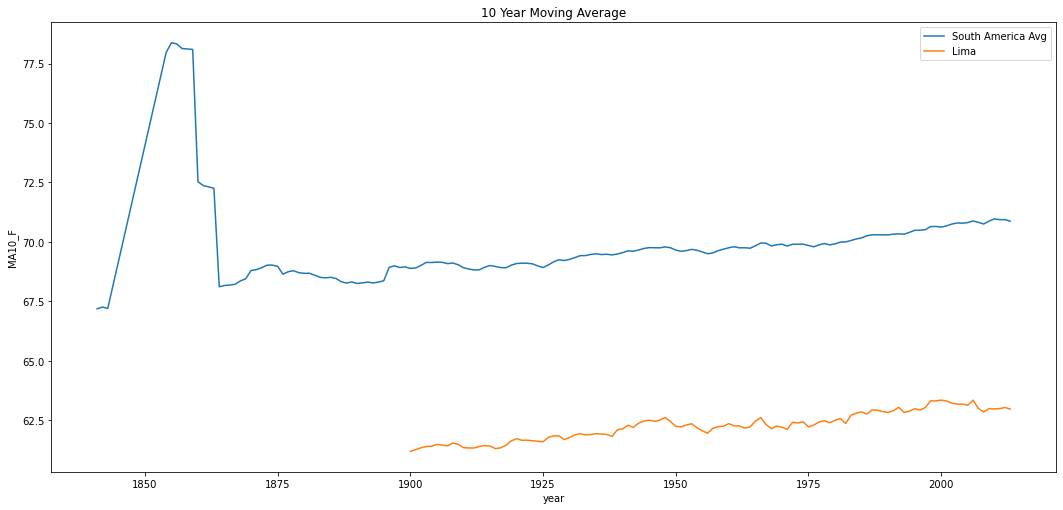

In [332]:
# compare continent to a city
fig, ax = pyplot.subplots(figsize= a4_dims)

region = 'South America'
city = 'Lima'

parent_df = cd[cd.continent == region]

df_agg = parent_df.groupby('year').mean().reset_index()
df = cd[cd.city == city]


plt.title("10 Year Moving Average")
sns.lineplot(x = df_agg.year
             , y = df_agg.MA10_F
             , data=df_agg
             , ci=None)
#plt.show()
#fig, ax = pyplot.subplots(figsize= a4_dims)
sns.lineplot(x = df.year
             , y = df.MA10_F
             , data=df
             , ci=None)
plt.legend([region + ' Avg', city])
plt.show()

In [328]:
cl[cl.country == 'Ecuador'][['lat','lon']]

,lat,lon
110,-2.170414,-79.905024
258,-0.220164,-78.512327
283,-0.340189,-79.171549


In [ ]:
# are all countries close to the equator hot?

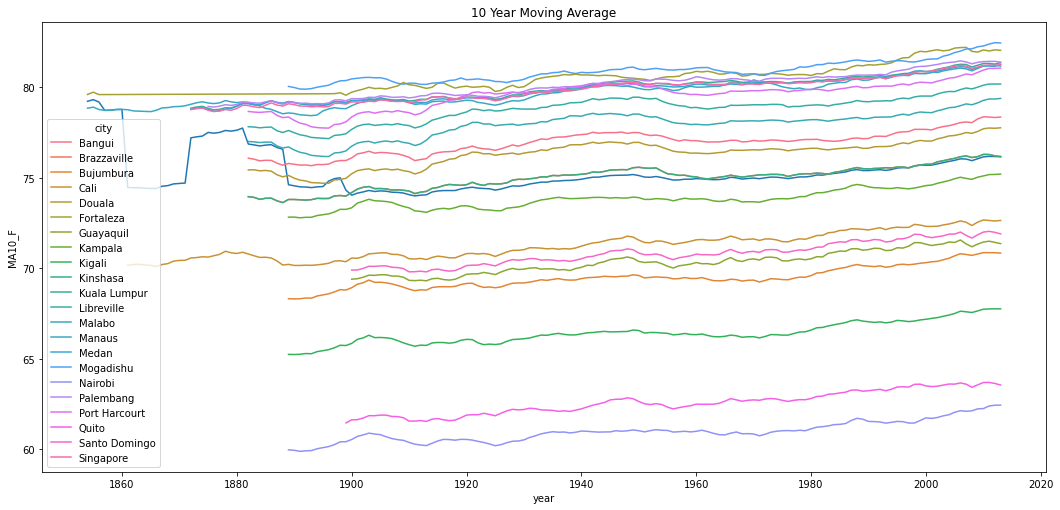

In [335]:
cl_near_equator = cl[(cl.lat < 5)& (cl.lat > -5)]

fig, ax = pyplot.subplots(figsize= a4_dims)

region = 'Countries Near Equator'
parent_df = cd[cd.city_id.isin(cl_near_equator.city_id.to_list())]

df_agg = parent_df.groupby('year').mean().reset_index()
df = parent_df


plt.title("10 Year Moving Average")
sns.lineplot(x = df_agg.year
             , y = df_agg.MA10_F
             , data=df_agg
             , ci=None)
#plt.show()
#fig, ax = pyplot.subplots(figsize= a4_dims)
sns.lineplot(x = df.year
             , y = df.MA10_F
             , data=df
            , hue=df.city
             , ci=None)
#plt.legend([region + ' Avg', city])
plt.show()

In [338]:
cl.iloc[0]

city               Abidjan
country      Côte D'Ivoire
lat               5.320357
lon              -4.016107
continent           Africa
city_id                  0
Name: 0, dtype: object

In [339]:
ods_key = 'eb1f82628222771439a4adbbb6d48c256b4e1530963e9e8db062c0ae'

In [340]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'pandas',
 'seaborn',
 'matplotlib.pyplot',
 'matplotlib.pyplot',
 'numpy',
 'googlemaps',
 'types']